<a href="https://colab.research.google.com/github/kenanmorani/Speech_Signal_Processing_idu/blob/main/Spectrogram_kenan_says_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Spectrogram of my Speech
Speech Signal Processing Course at Izmir Democracy University



# Introduction
* The following code plots the spectrogram of my speech 
* The speech ia a wave file of me shortly saying some words

In [7]:
# Installing and Importing the necessary libraries
!pip install matplotlib
!pip install librosa
%matplotlib inline  
import librosa                    
import IPython                
import numpy as np                 
import pandas as pd                
import scipy                       
import sklearn                     
import os                          

import librosa.display             
import matplotlib.pyplot as plt    
import seaborn as sns              
from scipy.fftpack import fft
from scipy.signal import get_window
from IPython.display import Audio

In [8]:
# Cloning the data from github
!git clone https://github.com/kenanmorani/Speech_Signal_Processing_idu

fatal: destination path 'Speech_Signal_Processing_idu' already exists and is not an empty directory.


In [4]:
# Load files using librosa
Kenan_says_hello, sr = librosa.load('/content/Speech_Signal_Processing_idu/data/Kenan says a.wav')
fs=sr # Use sr and fs interchangably

In [5]:
# Listening to the cough_sig_4
import IPython.display as ipd
ipd.Audio('/content/Speech_Signal_Processing_idu/data/Kenan says a.wav')

In [6]:
# Looking at the numebr of samples in the sound waves
print("cough4 sound samples are",cough_sig_4.size)

cough4 sound samples are 56504


In [ ]:
# Looking at sample duration
sample_duration = 1/sr
print('sample duration is', sample_duration, 'seconds')

sample duration is 4.5351473922902495e-05 seconds


In [ ]:
# Looking into the duration of the signals
cough_sig_4_duration = sample_duration * len(cough_sig_4)
print('duration of cough4 signal is', cough_sig_4_duration, 'seconds')
sneez_sig_3_duration = sample_duration * len(sneez_sig_3)
print('duration of sneez3 signal is', sneez_sig_3_duration, 'seconds')

duration of cough4 signal is 0.4414965986394558 seconds
duration of sneez3 signal is 1.0942403628117914 seconds


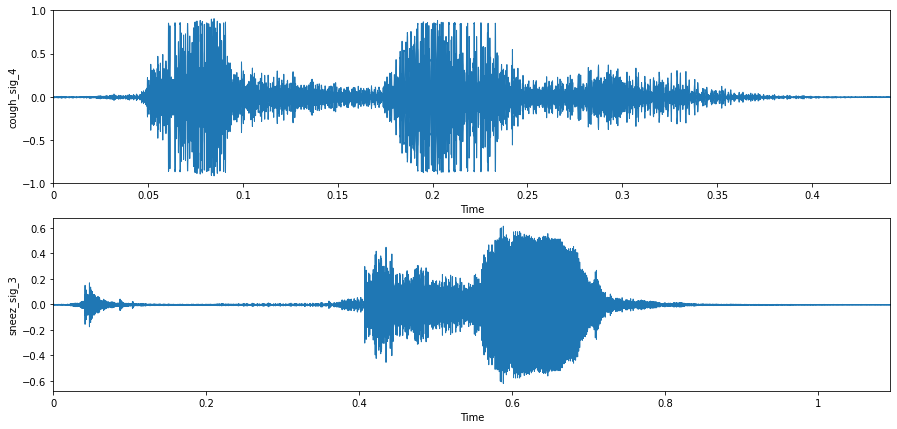

In [ ]:
# Displaying the wave sounds using librosa 
# Displaying the sound cough4 
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.ylabel('cough_sig_4')
plt.xlabel('Time')
librosa.display.waveplot(cough_sig_4, sr=fs)

# Displaying the sound sneez3 
plt.subplot(2,1,2)
plt.ylabel('sneez_sig_3')
plt.xlabel('Time')
librosa.display.waveplot(sneez_sig_3, sr=fs)

# Windowing in time domain

Text(0.5, 0, 'Time')

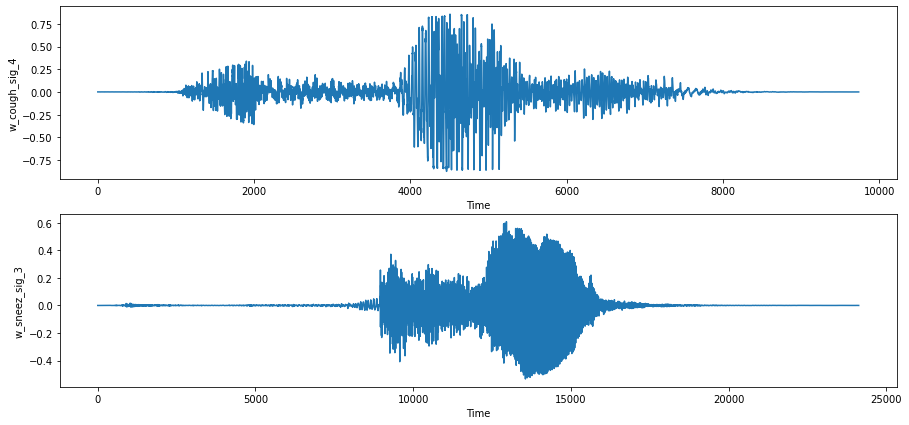

In [ ]:
#URL: https://www.programcreek.com/python/example/102138/numpy.hamming

# Using hamming window to conduct windowing in time domain
# Windowing on cough4 wave sound using numpy 
plt.figure(figsize=(15,7)) 
N = len(cough_sig_4)
w = np.hamming(N)
w_cough_sig_4 = cough_sig_4 * w 
plt.subplot (2,1,1)
plt.plot(w_cough_sig_4)
plt.ylabel('w_cough_sig_4')
plt.xlabel('Time')

# Windowing on sneez3 wave sound using numpy 
N = len(sneez_sig_3)
w = np.hamming(N)
w_sneez_sig_3 = sneez_sig_3 * w 
plt.subplot(2,1,2)
plt.plot(w_sneez_sig_3)
plt.ylabel('w_sneez_sig_3')
plt.xlabel('Time')

Comments and insight into the sound waves, mainly coughing sounds:  

Cough sound waves can be divided into periods and analysied for medical studies.    
* Cough 4 signal can be divided over time periods as follows:   
1.   Time between 0 to about 2500 is a brief state of
silience inside the bout of a cough.
2.   State of high energy before the cough. 
3.   State of less energy before the cough.  
4.   Inside the cough.

Reference Paper: 
> Teyhouee, Aydin, and Nathaniel D. Osgood. "Cough Detection Using Hidden Markov Models." International Conference on Social Computing, Behavioral-Cultural Modeling and Prediction and Behavior Representation in Modeling and Simulation. Springer, Cham, 2019. 

In [ ]:
# The length of the time domain of the signals at hand
print('time length for wave sound cough4=', len(w_cough_sig_4))
print('time length for wave sound sneez3=', len(w_sneez_sig_3))

time length for wave sound cough4= 9735
time length for wave sound sneez3= 24128


# The Amplitude Envelope
* The ampplitude envelope referes to the peaks of the signal over time duration.
* Windowing and Calculating the amplitude envelope.


Number of frames in amplitude envelope is 153


Text(0.5, 1.0, 'cough_sig_4')

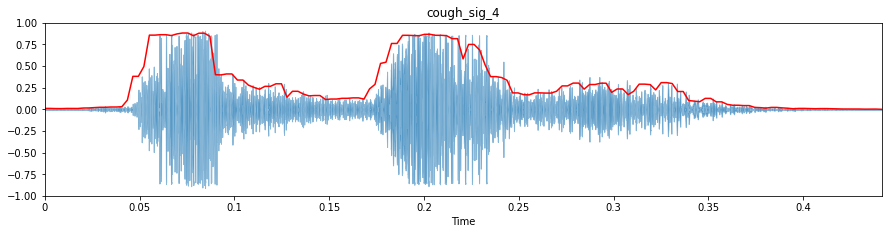

In [ ]:
# Calculating the amplitude envelope for cough4 using a function
frame_size = 128
hop_length = 64

def amplitude_envelope (cough_sig_4, frame_size, hope_size):
  return np.array([max(cough_sig_4[i:i+frame_size]) for i in range(0, len(cough_sig_4), hop_length)])

# number of frames in amplitude envelope
AE_cough_sig_4 = amplitude_envelope(cough_sig_4, frame_size, hop_length)
print('Number of frames in amplitude envelope is', len(AE_cough_sig_4))

# Visulization of the amplitude envelope
frames = range(len(AE_cough_sig_4))
t = librosa.frames_to_time(frames, hop_length=hop_length)
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 7))
ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(cough_sig_4, alpha=0.5)    # Displaying the cough4 sig
plt.plot(t, AE_cough_sig_4, color="r")   # Displaying the amplitude envelope of the signal in red
plt.ylim((-1, 1))
plt.title("cough_sig_4")

Comments on the amplitude envelope:   
* The envelope of the cough4 signl shows clearly that it is not a flat but more like percurssive signal. 
* One could notice that there is not much of a sudden onset in the cough4 sound which could otherwise indicate acute cough.
* URL: https://en.wikipedia.org/wiki/Cough

* Peaksof the energy envelope can be used to differentiate dry and wet coughs. 

Reference Paper:
>Chatrzarrin, Hanieh & Arcelus, Amaya & Goubran, Rafik & Knoefel, Frank. (2011). Feature extraction for the differentiation of dry and wet cough sounds. MeMeA 2011 - 2011 IEEE International Symposium on Medical Measurements and Applications, Proceedings. 10.1109/MeMeA.2011.5966670. 

# Root Mean Squared Energy

Text(0.5, 1.0, 'sneez 3')

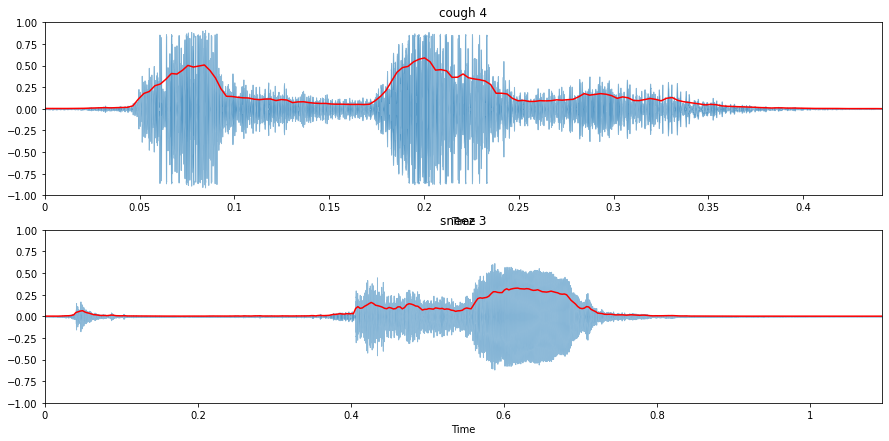

In [ ]:
# Extracting root mean squared energy using librosa
rmse_cough_sig_4 = librosa.feature.rms(cough_sig_4, frame_length=frame_size, hop_length=hop_length)[0]
rmse_sneez_sig_3 = librosa.feature.rms(sneez_sig_3, frame_length=frame_size, hop_length=hop_length)[0]

frames1 = range(len(rmse_cough_sig_4))
frames2 = range(len(rmse_sneez_sig_3))
t1 = librosa.frames_to_time(frames1, hop_length=hop_length)
t2 = librosa.frames_to_time(frames2, hop_length=hop_length)

# Plotting RMS-Energy
plt.figure(figsize=(15, 7))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(cough_sig_4, alpha=0.5)
plt.plot(t1, rmse_cough_sig_4, color="r")
plt.ylim((-1, 1))
plt.title("cough 4")

plt.subplot(2, 1, 2)
librosa.display.waveplot(sneez_sig_3, alpha=0.5)
plt.plot(t2, rmse_sneez_sig_3, color="r")
plt.ylim((-1, 1))
plt.title("sneez 3")

Comments on the Root mean squared / Energy:   
* The energy referes to the total magnitude of the sound or the loudness of the sound. Looking at the energy for the cough4 sound, we can say the cough is at its loudest roughly between 0.017 and 0.024 seconds.
* Comparing that to the loundness of the second wave sound, sneez3, which goes loud roughly between 0.046 and 0.07 seconds.  
* Comparing the two sound waves in terms of their loudness, the maximuim root mean squared energy is higher in cough4 sound, reaching about 0.50, whereas the maximuim root mean squred energy for the sneez sound wave reaches about 0.25. Therefore, we can say that the cough sound goes louder, maximuim-wise, than the sneez sound.  
* We can still comparing the loundness of different coughs and different sneezes, which could help distinguish the type of coughing or the reason for coughing or sneezing that is happening.

# Zero Crossing Rate 

Zero crossing rate formula is given as:
$$
zcr = \frac{1}{N-1} \sum_{n=1}^{N-1} | sign(x[n]) - sign(x[n-1]) |
$$



number of zero crossings for cough4 over all duration is 153
number of zero crossings for sneez3 over all duration is 378
number of zero crossings for cough4 where audable is 33
number of zero crossings for sneez3 where audable is 141


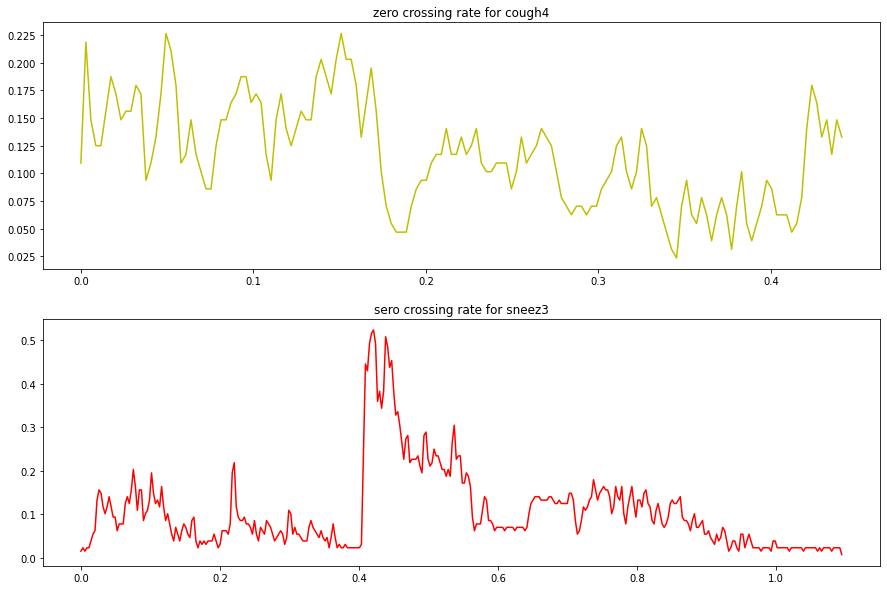

In [ ]:
# Zero Crossing Rate using librosa

# Zero crossing over all duration of the signals
zcr_cough_sig_4 = librosa.feature.zero_crossing_rate(cough_sig_4, frame_length=frame_size, hop_length=hop_length)[0]
zcr_sneez_sig_3 = librosa.feature.zero_crossing_rate(sneez_sig_3, frame_length=frame_size, hop_length=hop_length)[0]
print('number of zero crossings for cough4 over all duration is', zcr_cough_sig_4.size)
print('number of zero crossings for sneez3 over all duration is', zcr_sneez_sig_3.size)

# Zooming in on cough4 signal
n0 = 3900
n1 = 6000

# Zooming in on sneez3 signal
n2 = 9000
n3 = 18000
# zooming in where the sound of cough / sneez is audable
azcr_cough_sig_4 = librosa.feature.zero_crossing_rate(cough_sig_4[n0:n1], frame_length=frame_size, hop_length=hop_length)[0]
azcr_sneez_sig_3 = librosa.feature.zero_crossing_rate(sneez_sig_3[n2:n3], frame_length=frame_size, hop_length=hop_length)[0]
print('number of zero crossings for cough4 where audable is', azcr_cough_sig_4.size)
print('number of zero crossings for sneez3 where audable is', azcr_sneez_sig_3.size)

# Visualizing zero crossing rate
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.title('zero crossing rate for cough4')
plt.plot(t1, zcr_cough_sig_4, color="y")
plt.subplot(2,1,2)
plt.title('sero crossing rate for sneez3')
plt.plot(t2, zcr_sneez_sig_3, color="r")
plt.show()

Comments on Zero Crossing Rate    
* For the cough4 wave sound, we notice that the rate the wave sound crosses the zero is reletively high between 3900 and 6000 ms, this is due to the coughing being unvoiced human sound. 
* Comparing that to the zero crossing rate for the sneez3 sound wave, where the zero crossing rate is relatively higher between 9000 and 18000 ms, and this is when the unvoiced signal, sneezing, is mainly heard.
* The relatively high value of zero crossing rate shows also that coughing or sneezing is rather a percurssive non-pithed sound.


# Preprocessing the signal (FFT and Windowing)

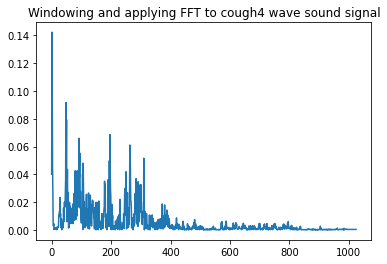

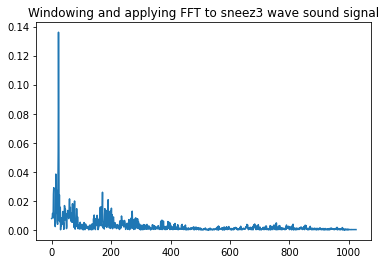

In [ ]:
# Windowing and applying FFT to the signals using librosa

import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
fft_w_cough_sig_4 = np.abs(librosa.stft(w_cough_sig_4[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.figure(1)
plt.title('Windowing and applying FFT to cough4 wave sound signal')
plt.plot(fft_w_cough_sig_4);

fft_w_sneez_sig_3= np.abs(librosa.stft(w_sneez_sig_3[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.figure(2)
plt.title('Windowing and applying FFT to sneez3 wave sound signal')
plt.plot(fft_w_sneez_sig_3);



# Spectrogram

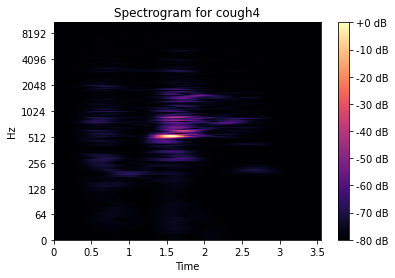

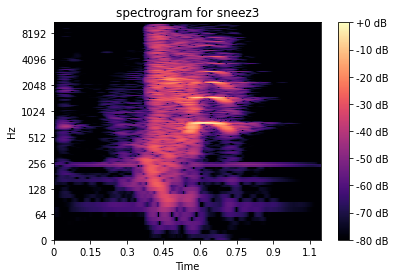

In [ ]:
# Spectrograms using librosa

# spectrogram for cough4
D = np.abs(librosa.stft(w_cough_sig_4, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='linear');

# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels
plt.figure(1)
plt.title('Spectrogram for cough4')
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

# spectrogram for sneez3
C = np.abs(librosa.stft(w_sneez_sig_3, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='linear');

# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels
plt.figure(2)
plt.title('spectrogram for sneez3')
CB = librosa.amplitude_to_db(C, ref=np.max)
librosa.display.specshow(CB, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

Comments on spectrogram     
The time(x-axis) and the frequency (y-axis) represent two aspects of the spectrogram. The intensity of the color shows the amplitude of the frequencies at times. 
* The sounds, are not harmonic, in other words they are not musical in nature. 
* Terefore, the energy spectrum of cough signal spreads widely in the frequency band. In other words, the magnitude of the frequencies over the times, or the intensity of the sound, changes fairly irregularly as can be seen in the figures of the spectrogram for the cough and the sneez sounds.
* Reference Paper:
>You, Mingyu & Wang, Huihui & Liu, Zeqin & Chong, Chen & Jiaming, Liu & Xu, Xianghuai & Zhong-Min, Qiu. (2017). A Novel Feature Extraction Method for Cough Detection using Non-Negative Matrix Factorization. IET Signal Processing. 11. 10.1049/iet-spr.2016.0341. 





# Mel-Frequency Cepstral Coefficents

MFCCs for cough4 signal (13, 20)
MFCCs for sneez3 signal (13, 48)


<Figure size 432x288 with 0 Axes>

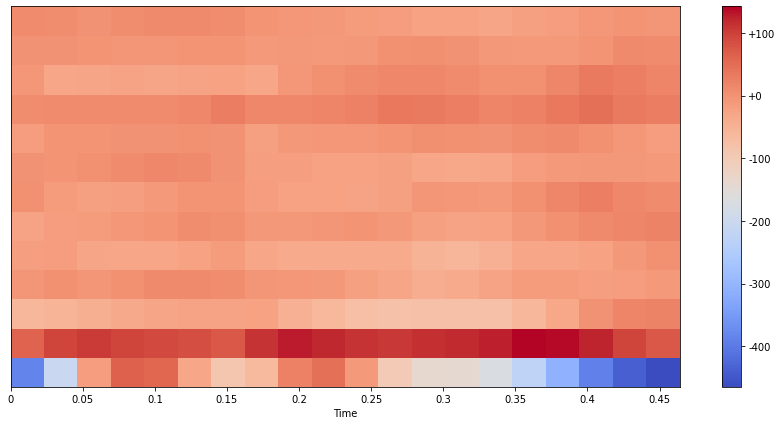

<Figure size 432x288 with 0 Axes>

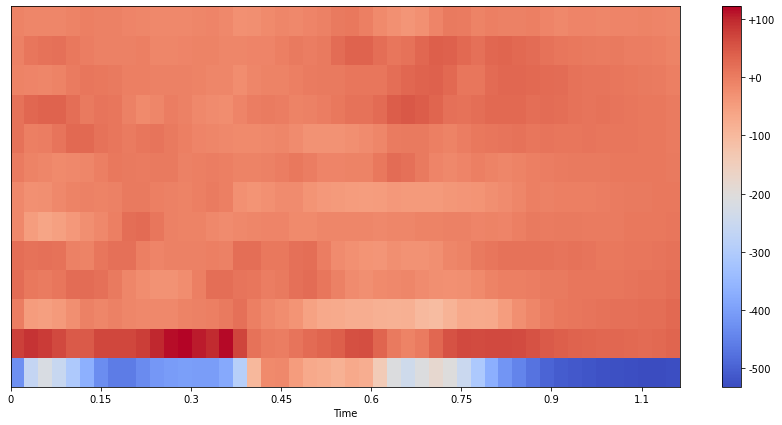

In [ ]:
# Exctracting MFCCs using librosa
# 13 coeffeiencts are chosen 
mfccs_cough_sig_4 = librosa.feature.mfcc(cough_sig_4, n_mfcc=13, sr=fs)  
mfccs_sneez_sig_3 = librosa.feature.mfcc(sneez_sig_3, n_mfcc=13, sr=fs)

print('MFCCs for cough4 signal', mfccs_cough_sig_4.shape)
print('MFCCs for sneez3 signal', mfccs_sneez_sig_3.shape)

# Visualizing MFCCs
plt.figure(1)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs_cough_sig_4, x_axis="time", sr=fs)
plt.colorbar(format="%+2.f")
plt.show()

plt.figure(2)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs_sneez_sig_3, x_axis="time", sr=fs)
plt.colorbar(format="%+2.f")
plt.show()

Comments on MFCCs: 
* MFCCs are not commonly used for non-pitch sound such as cold or cough since they more describe vocals related to the speech thus tell about the properties of speech or timbre. 
* However, they can be used alone or along with other features for cough detection in medical dignosis. They are mainly fed to AI predictive model;      
* MFFCs can be used along with machine learning algorithms to detect types of coughs and thus specify diseases related to them. Several research papers were focused on this area: 
* Tracey et al. worked on for cough detection aiming at monitoring patient recovery from tuberculosis. The algorithm worked on extracting MFCCs from the audio signals of
10 subjects. These were used to detect coughs accompanied with a artificial neural network (ANN) and support vector machine (SVM) classifiers. Some other research papers focused on using MFFCs along with other spectral features like formant frequencies, kurtosis, and B–score for cough detection before they fed it to an ANNS.

* Reference Papers:
>1. Tracey BH, Comina G, Larson S, Bravard M, Lopez JW, Gilman RH. Cough detection algorithm for
monitoring patient recovery from pulmonary tuberculosis. In: IEEE EMBC; 2011. p. 6017–6020.

 >2. Swarnkar V, Abeyratne UR, Amrulloh Y, Hukins C, Triasih R, Setyati A. Neural network based algorithm
for automatic identification of cough sounds. In: IEEE EMBC; 2013. p. 1764–1767.

# Energy Band Ration
* Frequency related feature 
* spectrogram is used to move to discrete frequency of the continious audio signals
* The threshold frequency (splitting frequency) between two energy bands was written

In [ ]:
# Exctracting spectrogram - Please see the explanatory comments below
FRAME_SIZE = 2048
HOP_SIZE = 512
cough_sig_4_spec = librosa.stft(cough_sig_4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
sneez_sig_3_spec = librosa.stft(sneez_sig_3, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

print('The whole frequency range in the cough_sig_4 is', cough_sig_4_spec.shape)  #(1025)
print('The whole frequency range in the sneez_sig_3 is', sneez_sig_3_spec.shape)  #(1025)

The whole frequency range in the cough_sig_4 is (1025, 20)
The whole frequency range in the sneez_sig_3 is (1025, 48)


In [ ]:
import math
# A function to calculate the splitting frequency
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2 # The spectrogram reduces the frequencies to mathc Nyquest Frequencies 
    frequency_delta_per_bin = frequency_range / num_frequency_bins # Delta is basically the difference between to neighbouring bins in the continious frequency
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
print ('the split frequency out of 1025 is calculated to be', split_frequency_bin)

the split frequency out of 1025 is calculated to be 185


In [ ]:
# Calculating the band energy ratio through a function - Please see the explanatory comments below
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2 # Square the spectrogram to move to the power / Energy
    power_spectrogram = power_spectrogram.T  # Taking the transpose of the power as in the formula 
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()  # Summing all up to the split frequency as in the formula - Nominator
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()  # Summing the bins from split frquency up words as in the formula - denomenator
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies  # Dividing high freuqncy powers to low frequency powers
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

<Figure size 432x288 with 0 Axes>

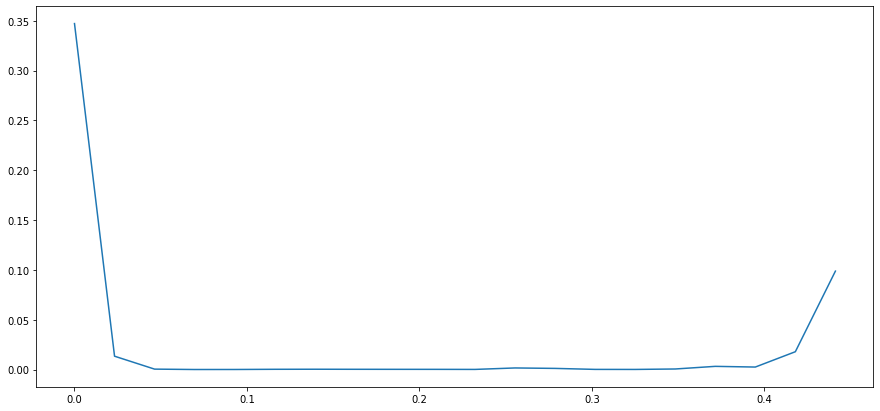

<Figure size 432x288 with 0 Axes>

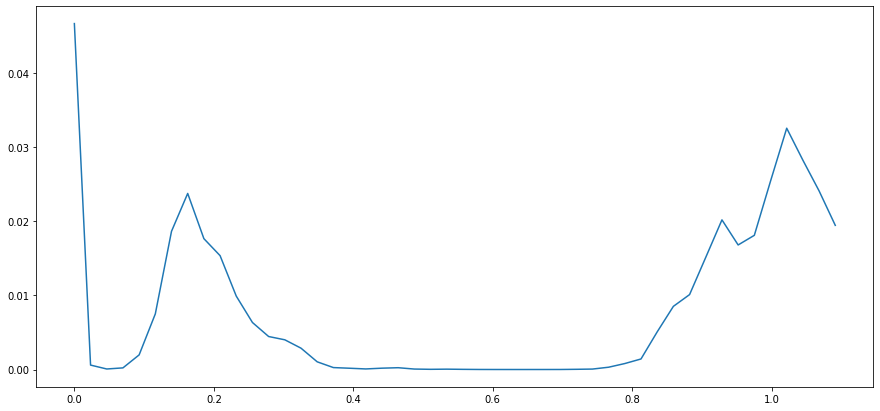

In [ ]:
# Plotting the Band Energy Ratio
frames1 = range(len(ber_cough_sig_4))
frames2 = range(len(ber_sneez_sig_3))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_SIZE)
t2 = librosa.frames_to_time(frames2, hop_length=HOP_SIZE)

plt.figure(1)
plt.figure(figsize=(15, 7))
plt.plot(t1, ber_cough_sig_4)
plt.show()
plt.figure(2)
plt.figure(figsize=(15, 7))
plt.plot(t2, ber_sneez_sig_3)
plt.show()

Comments on calculating band energy ration
* The calculation follows the formula 
BERt = SUM from n=1 to F-1 {mt(n)^2} / SUM from n=F to N{mt(n)^2}, where BERt references to the Energy Band Ration for the frame t (frequency-related feature). mt(n)^2 is basically the power for each bin in the frequency frames. F is the split frequency or the three shold between low band frequencies (nominator) and high band frequencies (denominator).
* Since the Band Energy Ratio is a frequency-related, we call the spectrogram of the audio signals we have. spec_cough_sig_4 and spec_sneez_sig_3. The spectrogram gives the discrete (non-continious) frequency to be used in the BER formula.
* The energy ratio is fairly unstable for sneez 3 signal, meaning there is not much stability in the signal given a noisy-like signal as can bee seen in the second figure above. 
* * Poweror ENergy ration between two frequency bands can beused along with other features such as energy envelope to detect cough types, dry and wet coughs.
References: 
> https://curve.carleton.ca/system/files/etd/91d9768a-fdfc-4145-a9a4-a2255cdee360/etd_pdf/0ab37fbde60f27301616e43085ba99fb/chatrzarrin-featureextractionforthedifferentiationofdry.pdf